In [62]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
data = pd.read_csv('pollution.csv')  # Remplacez par le chemin de votre fichier si nécessaire

# Préparation des données
# Extraction de la colonne explicative et de la colonne cible
X = data[['Population_Density']]
y = data['Air Quality']

# Encodage des labels de la cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Création et entraînement du modèle
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.38466666666666666

Classification Report:
               precision    recall  f1-score   support

        Good       0.40      0.85      0.54       591
   Hazardous       0.00      0.00      0.00       152
    Moderate       0.31      0.16      0.21       474
        Poor       0.00      0.00      0.00       283

    accuracy                           0.38      1500
   macro avg       0.18      0.25      0.19      1500
weighted avg       0.26      0.38      0.28      1500



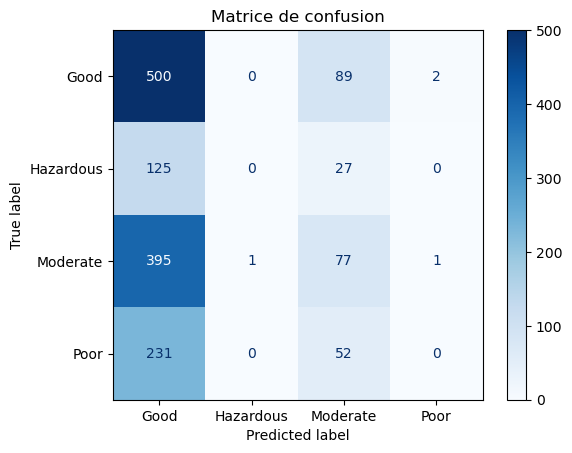

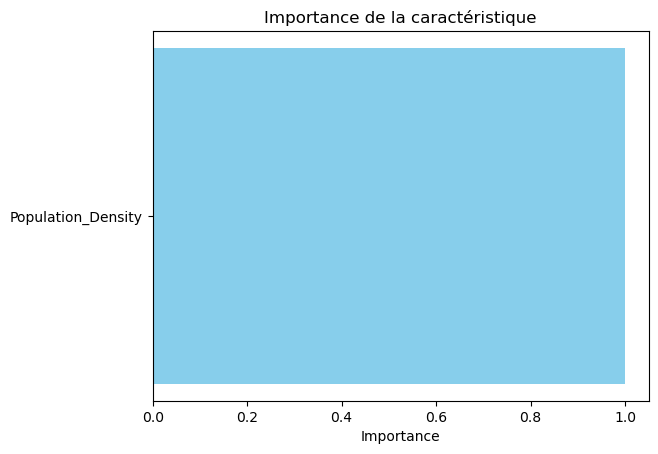

In [64]:
# Importation pour les visualisations
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

# Visualisation de l'importance des caractéristiques
# Bien qu'il n'y ait qu'une seule caractéristique, cela montre son poids
importances = rf_model.feature_importances_
plt.barh(['Population_Density'], importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Importance de la caractéristique")
plt.show()